In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Does nn.Conv2d init work well?

In [3]:
mnist = tf.keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_train.min(), y_train.max())
n, m = x_train.shape
c = y_train.max() + 1
print(n, m, c)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000,) (10000, 784) (10000,) 0 9
60000 784 10


In [4]:
def normalize(x, m, s): return (x - m) / s

In [5]:
train_mean, train_std = x_train.mean(), x_train.std()
train_mean, train_std

(33.318421449829934, 78.56748998339798)

In [6]:
x_train = normalize(x_train, train_mean, train_std)
x_test  = normalize(x_test,  train_mean, train_std)

In [7]:
train_mean, train_std = x_train.mean(), x_train.std()
train_mean, train_std

(-3.064638490070051e-17, 0.9999999999999998)

In [8]:
x_train.shape

(60000, 784)

In [9]:
# in order to run the kernel, 5 x 5 - see bellow cells, I reshape 
# into 60000 x 28 x 28 x 1, the last dimension is because we have only one channel
x_train = tf.reshape(x_train, [x_train.shape[0], 28, 28])[..., None]
x_test  = tf.reshape(x_test , [x_test.shape[0], 28, 28])[..., None]
x_train.shape, x_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

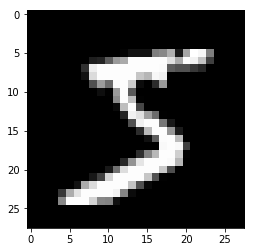

In [10]:
plt.imshow(tf.squeeze(x_train[0]), cmap='gray')

In [185]:
# Conv2d: check here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable
nh = 32
# nh: number of output channels
# l1 = tf.keras.layers.Conv2D(nh, kernel_size=5, kernel_initializer='he_normal')
l1 = tf.keras.layers.Conv2D(nh, kernel_size=5, kernel_initializer='he_normal')#, activation=tf.nn.relu)
l2 = tf.keras.layers.LeakyReLU(alpha=0.0) # play with the relu

In [186]:
x = x_test[:10000]
x.shape

TensorShape([10000, 28, 28, 1])

In [187]:
def stats(x): return tf.math.reduce_mean(x), tf.math.reduce_std(x)

In [188]:
t = l1(x)
t = l2(t)

W1226 09:39:23.927803 140367696742144 base_layer.py:1814] Layer conv2d_39 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [189]:
# we would like it to be a mean of 0.0 and std of 1.0
# mean of 0.0 ok and std not ok
stats(t)

(<tf.Tensor: id=1314, shape=(), dtype=float32, numpy=0.5526032>,
 <tf.Tensor: id=1321, shape=(), dtype=float32, numpy=1.0131708>)

In [149]:
# get the weights and bias of the Conv2d layer
weights, bias = l1.weights
weights.shape, bias.shape

(TensorShape([5, 5, 1, 32]), TensorShape([32]))

In [ ]:
# TODO:
# re-play https://course.fast.ai/videos/?lesson=9 untill 22:00 + reimplement
# understand the theoretical developments in-depth
# init a layer and run it multiple time
# understand the bakward path and try to get the gradients